## Load Data and Initial Grid Search

In [2]:
# Assign directory
import os
BRANDON = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/'
YASH = '/Users/yashd/Desktop/hierarchical-bayesian-model-validation/'
HANNAH = ''
ZIXUN = ''

ROOT_DIR = YASH
os.chdir(ROOT_DIR + 'testing-framework/')

SKIP_OPTIMIZE_STEP = True
CONSTANT_SAMPLE_SIZE = 100000
GROUP = 'layer'

DATA_NAME = 'approx1e5-toy-agriVision-red-wavelet'
ORIGINAL_NAME = DATA_NAME[10:]


''' Only need to run commented code (3 lines) once'''
# os.mkdir(DATA_NAME)
# os.mkdir(os.path.join(DATA_NAME, "CSVs"))
# os.mkdir(os.path.join(DATA_NAME, "plots"))

print("Make sure this corresponds with the full name of dataset:", ORIGINAL_NAME)

Make sure this corresponds with the full name of dataset: toy-agriVision-red-wavelet


In [3]:
from utilities import *
from plot_utilities import *
data_df = pd.read_pickle(f'../transformed-data/{ORIGINAL_NAME}.pickle')
MIN_GROUP, MAX_GROUP = 2, 10 # Should be 2, 8/9/10 if wavelet; 2, 14 if fourier. Inspect data_df and decide based on minimum and maximum values
data_df[GROUP].apply([min, max])

min     1
max    10
Name: layer, dtype: int64

In [4]:
''' Only need to run commented code (10 lines) once'''

min_group, max_group = MIN_GROUP, MAX_GROUP
total_samples = []
group_data_map = dict()
for group in np.arange(min_group, max_group + 1):
    if GROUP == 'layer':
        data = np.append(data_df[(data_df['orientation'] == 'H') & (data_df[GROUP] == group)]['data'].iloc[0],
                     data_df[(data_df['orientation'] == 'V') & (data_df[GROUP] == group)]['data'].iloc[0])
    elif GROUP == 'band':
        data = data_df[(data_df[GROUP] == group)]['data'].iloc[0]

    total_samples.append(data.size)
    group_data_map[group] = np.sort(data)[np.unique(np.round(np.linspace(0, data.size - 1, CONSTANT_SAMPLE_SIZE)).astype(int))] 
pd.to_pickle(group_data_map, f'{DATA_NAME}/group_data_map.pickle')

min_group, max_group = MIN_GROUP, MAX_GROUP
group_data_map = pd.read_pickle(f'{DATA_NAME}/group_data_map.pickle')
group_data_map

{2: array([-4826.8984375 , -2163.046875  , -1546.71875   , ...,
         1993.37890625,  3551.38476563,  6479.35546875]),
 3: array([-3283.90625   , -3097.9765625 , -2570.9765625 , ...,
         2395.51171875,  2795.91015625,  4101.12109375]),
 4: array([-2808.28125  , -2698.5234375, -2357.3828125, ...,  1490.09375  ,
         1742.9609375,  1762.3671875]),
 5: array([-2608.765625, -1791.359375, -1077.046875, ...,  1207.203125,
         2507.71875 ,  2556.46875 ]),
 6: array([-2332.5625 , -1102.0625 ,  -942.     , ...,   998.71875,
         1069.3125 ,  2308.03125]),
 7: array([-1053.75  ,  -477.3125,  -386.    , ...,   341.75  ,   428.8125,
         1115.875 ]),
 8: array([-512.75 , -208.875, -160.25 , ...,  172.125,  228.375,  540.625]),
 9: array([-205.  , -102.  ,  -87.25, ...,   90.5 ,  106.  ,  199.75]),
 10: array([-83.5, -46. , -41. , ...,  41.5,  47. ,  87.5])}

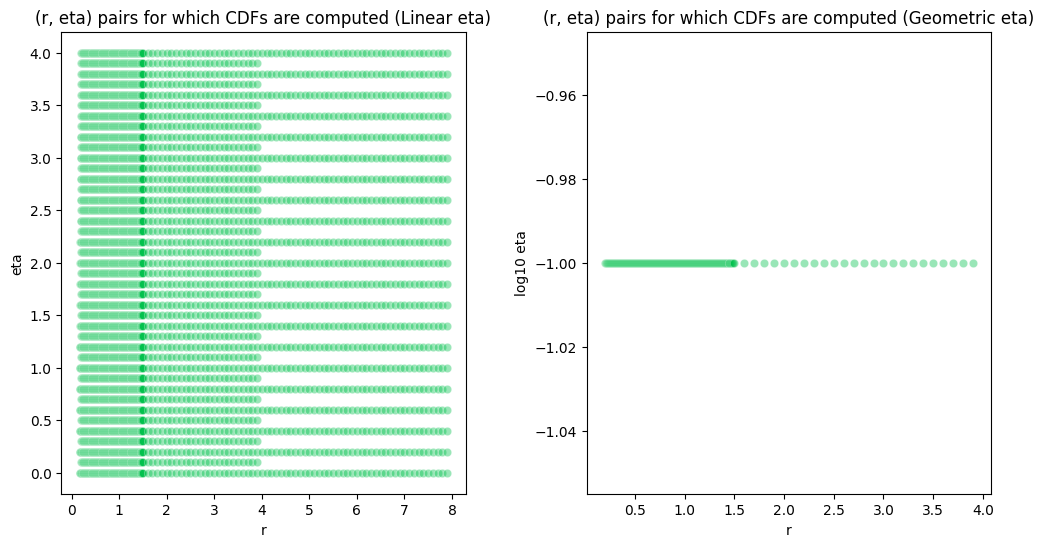

,"(r,eta),cdf",r,eta,cdf
0,"((0.17, 0), <scipy.interpolate._cubic.CubicSpl...",0.17,0.0,<scipy.interpolate._cubic.CubicSpline object a...
1,"((0.17, 0.2), <scipy.interpolate._cubic.CubicS...",0.17,0.2,<scipy.interpolate._cubic.CubicSpline object a...
2,"((0.17, 0.4), <scipy.interpolate._cubic.CubicS...",0.17,0.4,<scipy.interpolate._cubic.CubicSpline object a...
3,"((0.17, 0.6), <scipy.interpolate._cubic.CubicS...",0.17,0.6,<scipy.interpolate._cubic.CubicSpline object a...
4,"((0.17, 0.8), <scipy.interpolate._cubic.CubicS...",0.17,0.8,<scipy.interpolate._cubic.CubicSpline object a...
...,...,...,...,...
7226,"((7.9, 3.2), <scipy.interpolate._cubic.CubicSp...",7.90,3.2,<scipy.interpolate._cubic.CubicSpline object a...
7227,"((7.9, 3.4), <scipy.interpolate._cubic.CubicSp...",7.90,3.4,<scipy.interpolate._cubic.CubicSpline object a...
7228,"((7.9, 3.6), <scipy.interpolate._cubic.CubicSp...",7.90,3.6,<scipy.interpolate._cubic.CubicSpline object a...
7229,"((7.9, 3.8), <scipy.interpolate._cubic.CubicSp...",7.90,3.8,<scipy.interpolate._cubic.CubicSpline object a...


In [5]:
# Large grid search CDFs already computed (r = 0 to 8, eta = 0 to 3.9)

all_cdfs = combine_pickles('scipy_10000') | combine_pickles('mtlb_10000') | combine_pickles('mtlb_100000')
all_cdfs_df = pd.DataFrame({'(r,eta),cdf' : sorted(all_cdfs.items())})
all_cdfs_df['r'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[0].str[0])
all_cdfs_df['eta'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[0].str[1])
all_cdfs_df['cdf'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[1])

create_scatter_plots_log_eta(all_cdfs_df)

all_cdfs_df.sort_values(['r', 'eta'])

In [7]:
''' Only need to run commented code (13 lines) once'''
master_df = pd.DataFrame(columns = [GROUP, 'num_samples', 'initial_param', 'kstest_stat_initial', 'best_param_eta_0', 'kstest_stat_eta0'])
idx_eta0 = [i for i, param in enumerate(sorted(all_cdfs)) if np.isclose(param[1], 0, atol = 1e-40)]
sorted_params = sorted(all_cdfs)
for i, group in enumerate(np.arange(min_group, max_group+1)):
    print("Processing group (layer/band) ", group)
    sample = group_data_map[group]
    ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs)
    ksstats_eta0 = [ksstats[i] for i in idx_eta0]
    idx_min_ksstats_eta0 = idx_eta0[np.argmin(ksstats_eta0)]
    master_df.loc[i, :] = [group, sample.size, initial_param, min_stat, sorted_params[idx_min_ksstats_eta0], ksstats[idx_min_ksstats_eta0]]
master_df = master_df.set_index(GROUP)
master_df['total_samples'] = total_samples
master_df.to_csv(f'{DATA_NAME}/CSVs/initial_eta0_grid.csv')

master_df = pd.read_csv(f'{DATA_NAME}/CSVs/initial_eta0_grid.csv', index_col=GROUP)
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[group]['initial_param'][1:-1].split(',')) for group in master_df.index]
master_df

Processing group (layer/band)  2
Processing group (layer/band)  3
Processing group (layer/band)  4
Processing group (layer/band)  5
Processing group (layer/band)  6
Processing group (layer/band)  7
Processing group (layer/band)  8
Processing group (layer/band)  9
Processing group (layer/band)  10


,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0,total_samples
layer,,,,,,
2,2016,"(0.23, 0.0)",0.054269,"(0.23, 0)",0.054269,2016
3,8064,"(0.28, 0.1)",0.076343,"(0.27, 0)",0.076562,8064
4,32256,"(0.34, 0.0)",0.084420,"(0.34, 0)",0.084420,32256
5,100000,"(0.44, 0.0)",0.101250,"(0.44, 0)",0.101250,129024
6,100000,"(0.56, 0.2)",0.130780,"(0.8, 0)",0.130780,516096
7,100000,"(1.32, 0.1)",0.171150,"(1.25, 0)",0.171150,2064384
8,100000,"(0.45, 0.3)",0.239720,"(1.25, 0)",0.239720,8257536
9,100000,"(0.45, 0.0)",0.297740,"(0.45, 0)",0.297740,33030144
10,100000,"(0.39, 0.0)",0.404110,"(0.39, 0)",0.404110,132120576


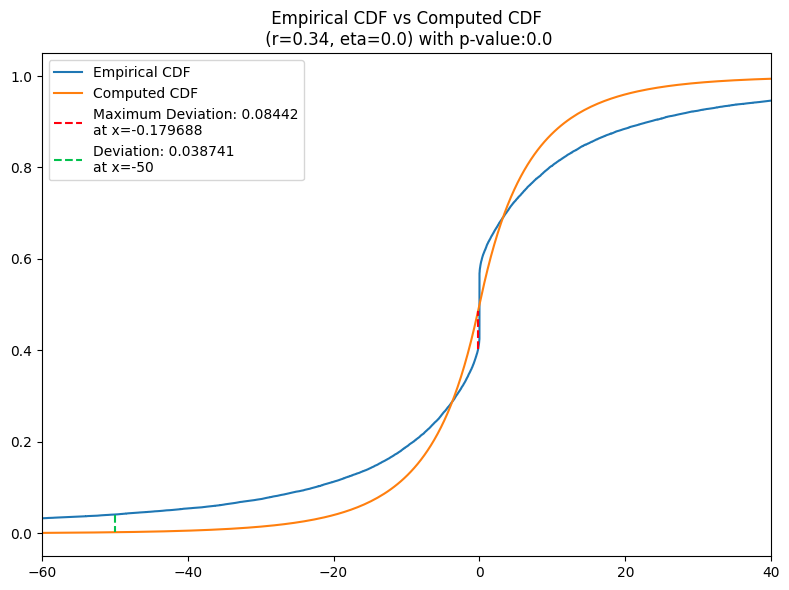

In [8]:
# To visualize a specific input
group = 4
visualize_cdf(group_data_map[group], 
              all_cdfs = all_cdfs, 
              params= master_df.loc[group, 'initial_param'], 
              n_samples=10000, interval = (-60, 40), 
              provided_loc = -50);

In [9]:
# Given that pvalue = 0.05 and I have n samples, what should the kstest statistic be?
# Note how as num_samples increases by a factor of 4, the cutoff decreases by a factor of 2
# Could potentially include the plot in `images/loglog_pvalue_numsamples.png` 

for group in np.arange(min_group, max_group+1):
    num_points = master_df.loc[group, 'total_samples'] # Note that we use total samples, not num_samples
    master_df.loc[group, 'kstest_stat_cutoff_0.05'] = stats.kstwo(n=num_points).isf(0.05)    
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0,total_samples,kstest_stat_cutoff_0.05
layer,,,,,,,
2,2016,"(0.23, 0.0)",0.054269,"(0.23, 0)",0.054269,2016,0.030163
3,8064,"(0.28, 0.1)",0.076343,"(0.27, 0)",0.076562,8064,0.015103
4,32256,"(0.34, 0.0)",0.084420,"(0.34, 0)",0.084420,32256,0.007557
5,100000,"(0.44, 0.0)",0.101250,"(0.44, 0)",0.101250,129024,0.003780
6,100000,"(0.56, 0.2)",0.130780,"(0.8, 0)",0.130780,516096,0.001890
7,100000,"(1.32, 0.1)",0.171150,"(1.25, 0)",0.171150,2064384,0.000945
8,100000,"(0.45, 0.3)",0.239720,"(1.25, 0)",0.239720,8257536,0.000473
9,100000,"(0.45, 0.0)",0.297740,"(0.45, 0)",0.297740,33030144,0.000236
10,100000,"(0.39, 0.0)",0.404110,"(0.39, 0)",0.404110,132120576,0.000118


In [10]:
r_d, eta_d = 3, 2 # Controls precision to which parameters are optimized
SKIP_OPTIMIZE_STEP = True

if SKIP_OPTIMIZE_STEP:
    r_d, eta_d = 2, 1
    master_df['kstest_stat_cd'] = master_df['kstest_stat_initial']
    master_df[f'best_r_d{r_d}'] = master_df['initial_param'].apply(lambda x : x[0])
    master_df[f'best_eta_d{eta_d}'] = master_df['initial_param'].apply(lambda x : x[1])

else:
    for group in np.arange(min_group, max_group+1): 
        sample = group_data_map[group]
        initial_param = master_df.loc[group, 'initial_param']
        master_df.loc[group, f'best_r_d{r_d}'], master_df.loc[group, f'best_eta_d{eta_d}'] = coord_descent_gengamma(sample, initial_param, 
                                                                                                                    r_depth = r_d, eta_depth=eta_d, 
                                                                                                                    scipy_int=False, group=group, 
                                                                                                                    eng=eng, DATA_NAME=DATA_NAME)
        master_df.loc[group, 'kstest_stat_cd'] = compute_ksstat(sample, combine_pickles(f'{DATA_NAME}_group{group}_10000')[(master_df.loc[group, f'best_r_d{r_d}'], master_df.loc[group, f'best_eta_d{eta_d}'])])
        print(f"{GROUP} {group} best parameters: {master_df.loc[group, 'kstest_stat_cd']}")


master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_cd'], row.loc['total_samples']), axis = 1)    
master_df[['num_samples', 'total_samples', 'initial_param', 'kstest_stat_initial', f'best_r_d{r_d}', f'best_eta_d{eta_d}', 'kstest_stat_cd', 'n_pval_0.05']].to_csv(f'{DATA_NAME}/CSVs/optimized_params.csv')
master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_post_optimize.csv')

master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_post_optimize.csv', index_col = GROUP)
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[group]['initial_param'][1:-1].split(',')) for group in master_df.index]
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0,total_samples,kstest_stat_cutoff_0.05,kstest_stat_cd,best_r_d2,best_eta_d1,n_pval_0.05
layer,,,,,,,,,,,
2,2016,"(0.23, 0.0)",0.054269,"(0.23, 0)",0.054269,2016,0.030163,0.054269,0.23,0.0,637
3,8064,"(0.28, 0.1)",0.076343,"(0.27, 0)",0.076562,8064,0.015103,0.076343,0.28,0.1,318
4,32256,"(0.34, 0.0)",0.084420,"(0.34, 0)",0.084420,32256,0.007557,0.084420,0.34,0.0,252
5,100000,"(0.44, 0.0)",0.101250,"(0.44, 0)",0.101250,129024,0.003780,0.101250,0.44,0.0,175
6,100000,"(0.56, 0.2)",0.130780,"(0.8, 0)",0.130780,516096,0.001890,0.130780,0.56,0.2,105
7,100000,"(1.32, 0.1)",0.171150,"(1.25, 0)",0.171150,2064384,0.000945,0.171150,1.32,0.1,63
8,100000,"(0.45, 0.3)",0.239720,"(1.25, 0)",0.239720,8257536,0.000473,0.239720,0.45,0.3,31
9,100000,"(0.45, 0.0)",0.297740,"(0.45, 0)",0.297740,33030144,0.000236,0.297740,0.45,0.0,19
10,100000,"(0.39, 0.0)",0.404110,"(0.39, 0)",0.404110,132120576,0.000118,0.404110,0.39,0.0,10


## Comparing Empirical and Computed CDF/PDF

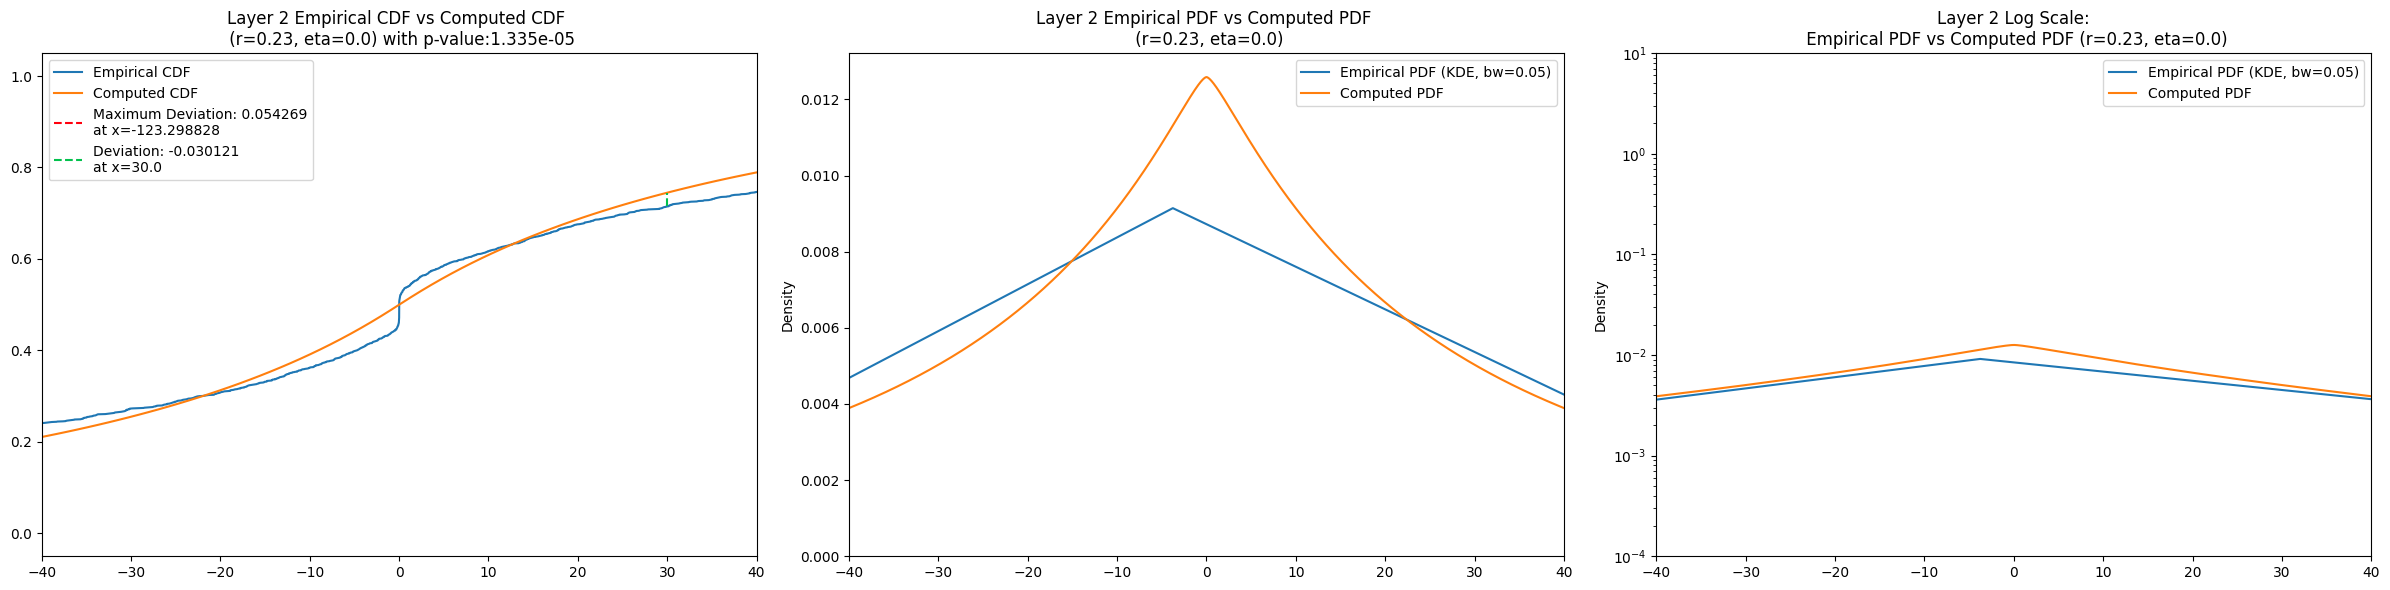

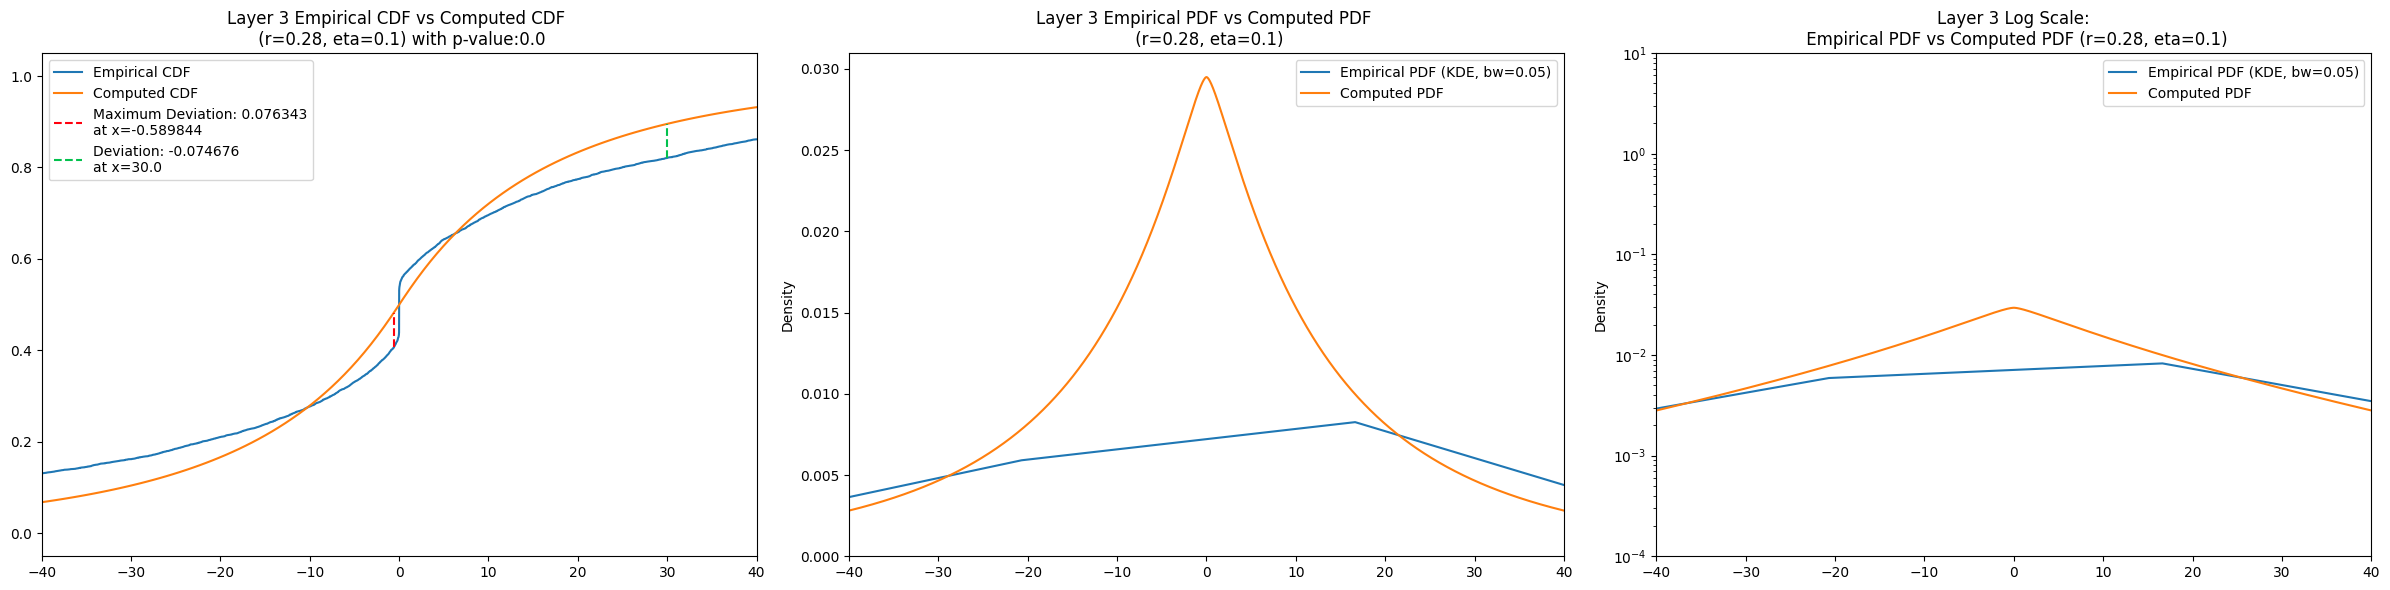

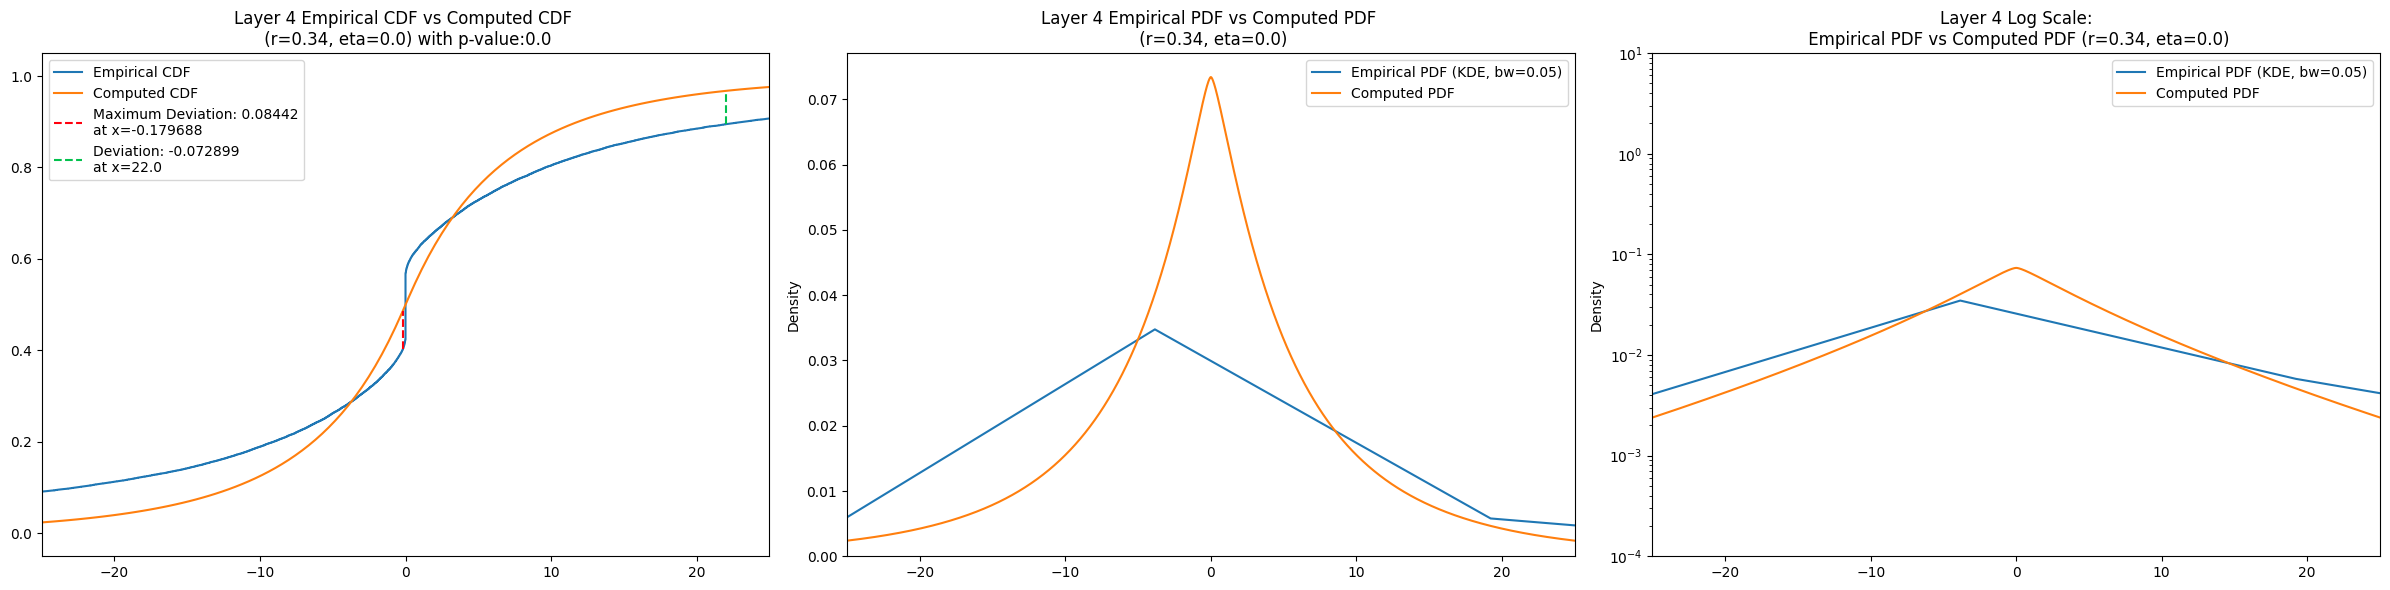

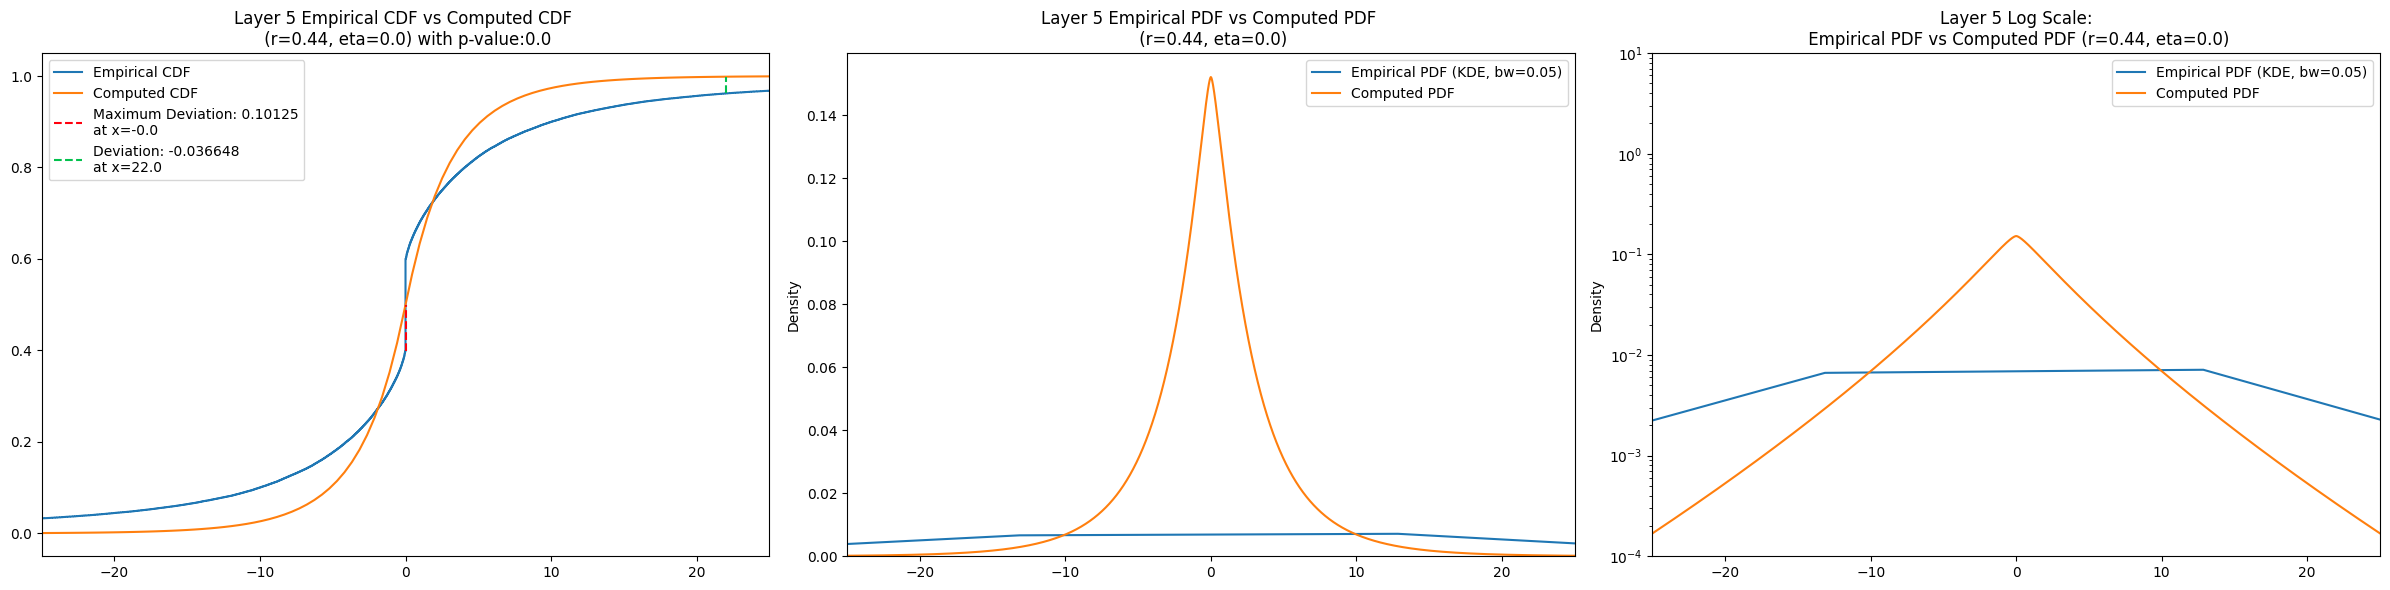

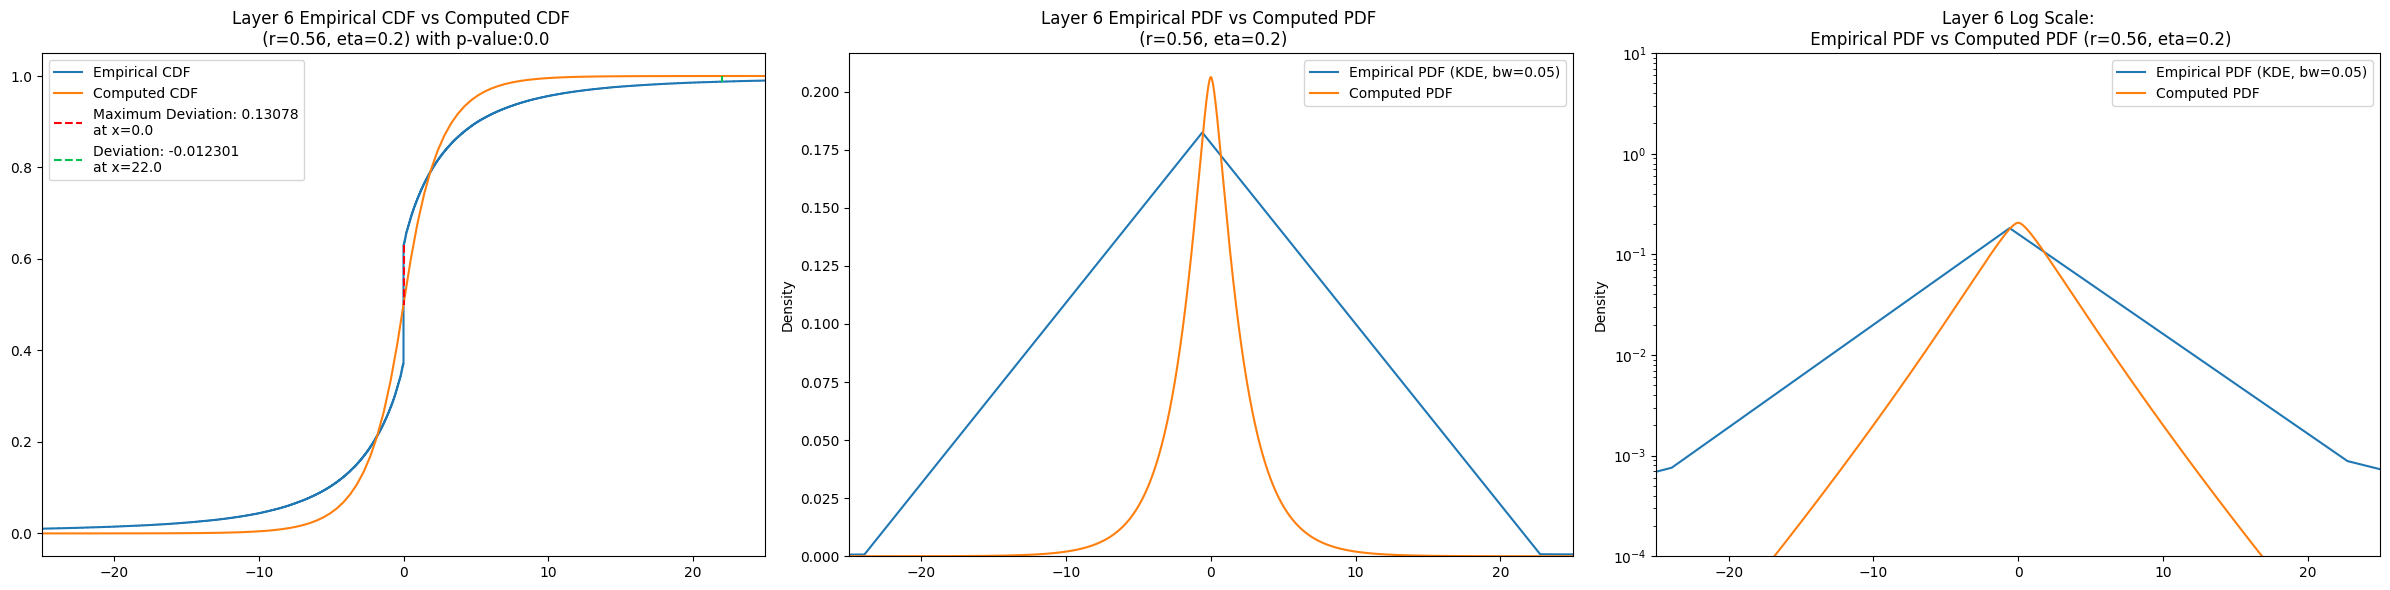

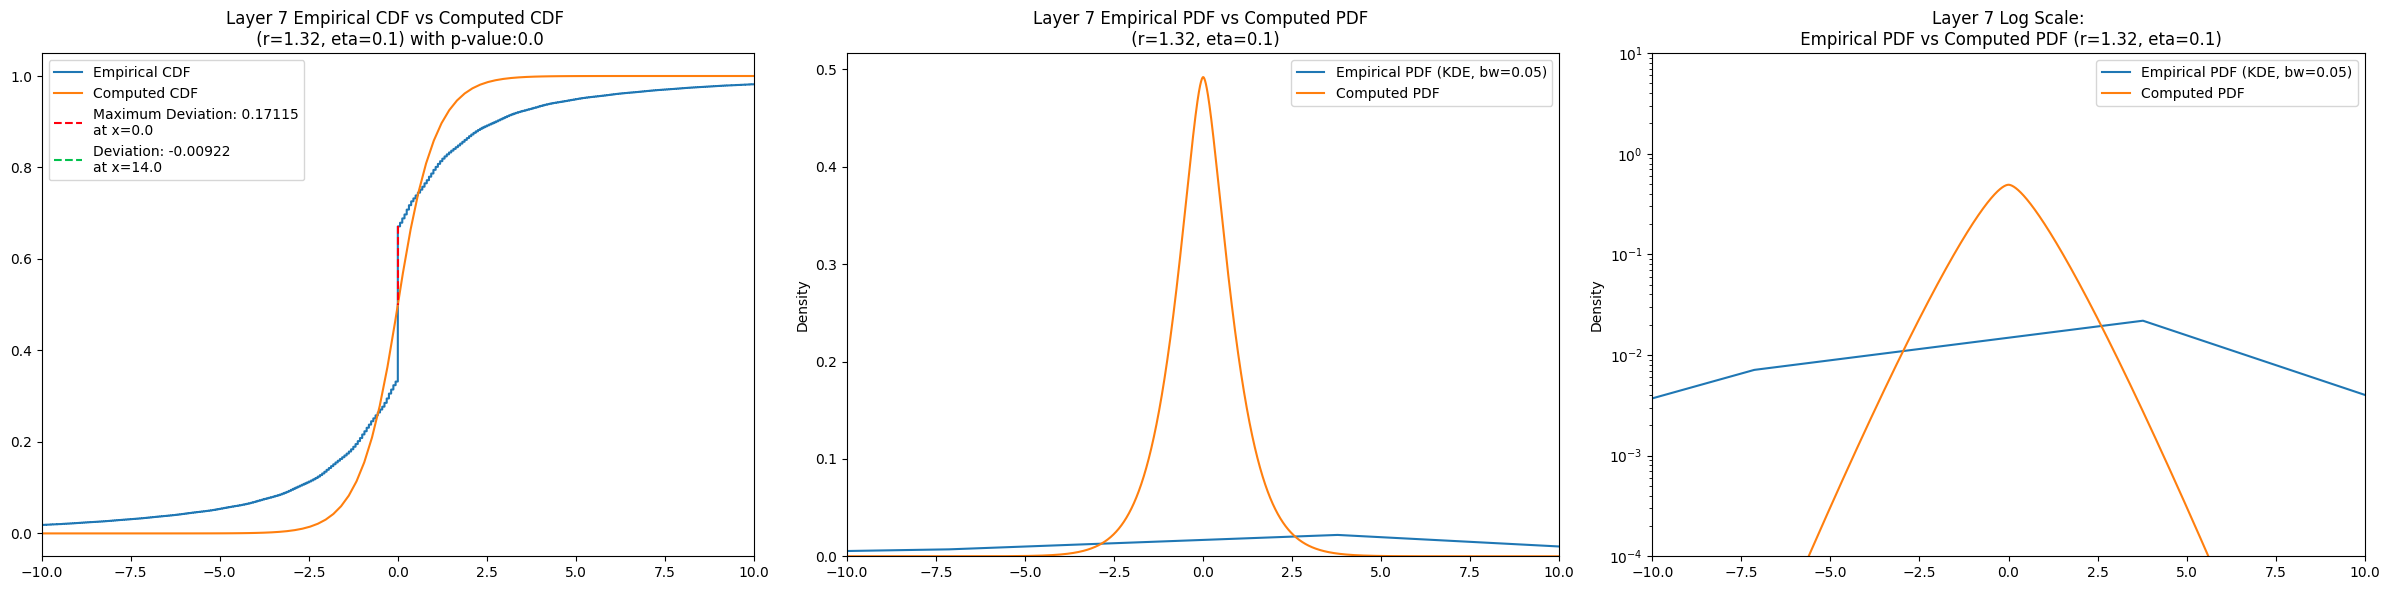

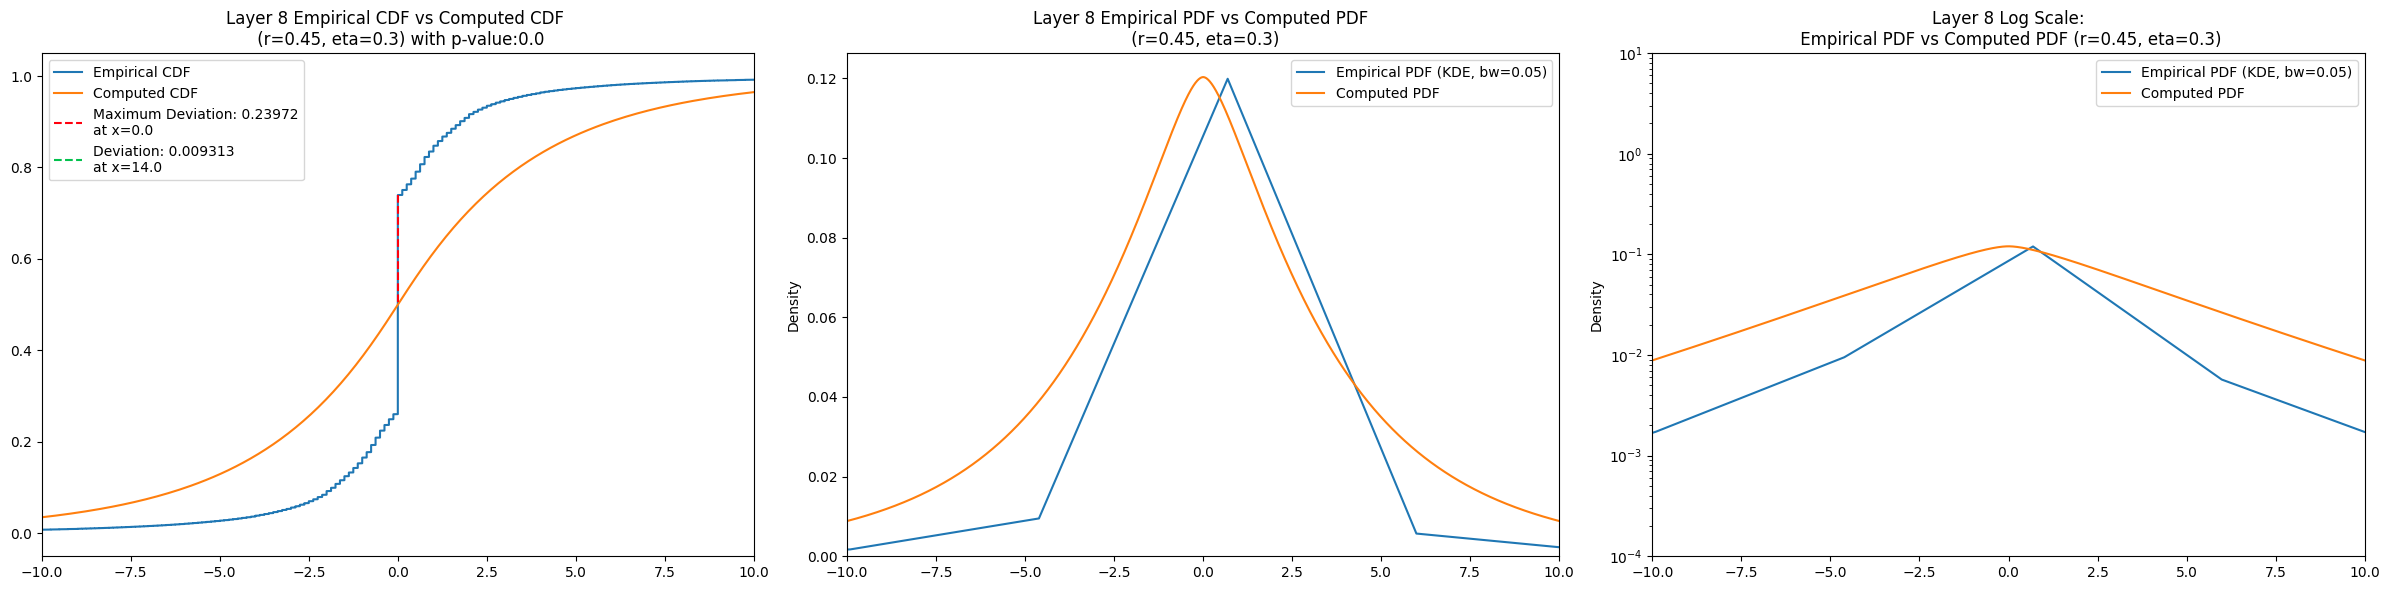

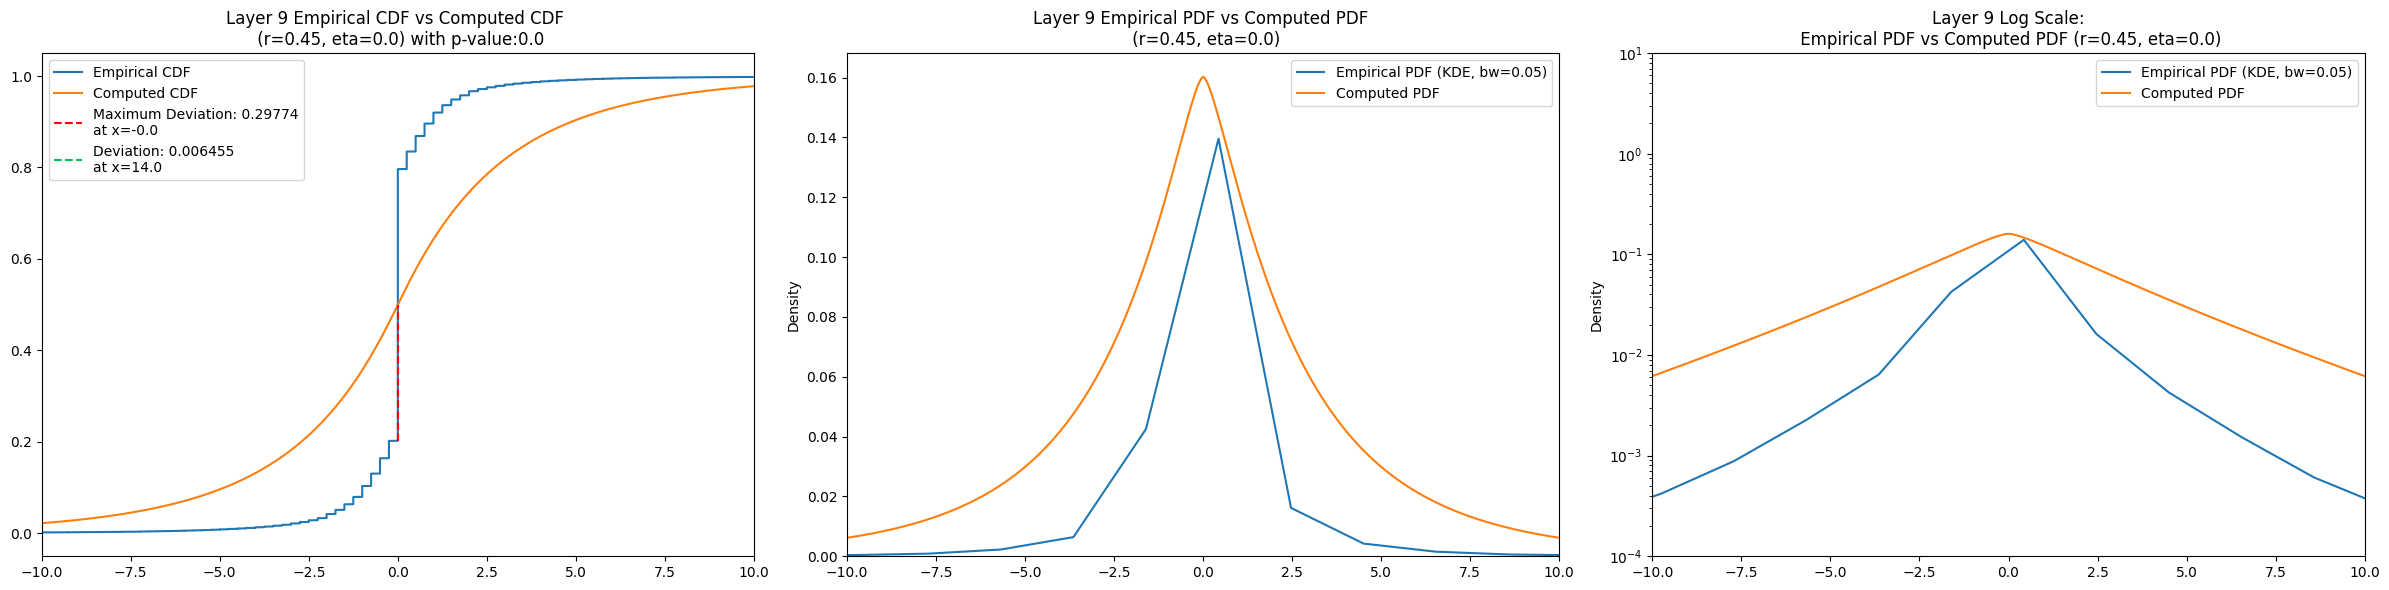

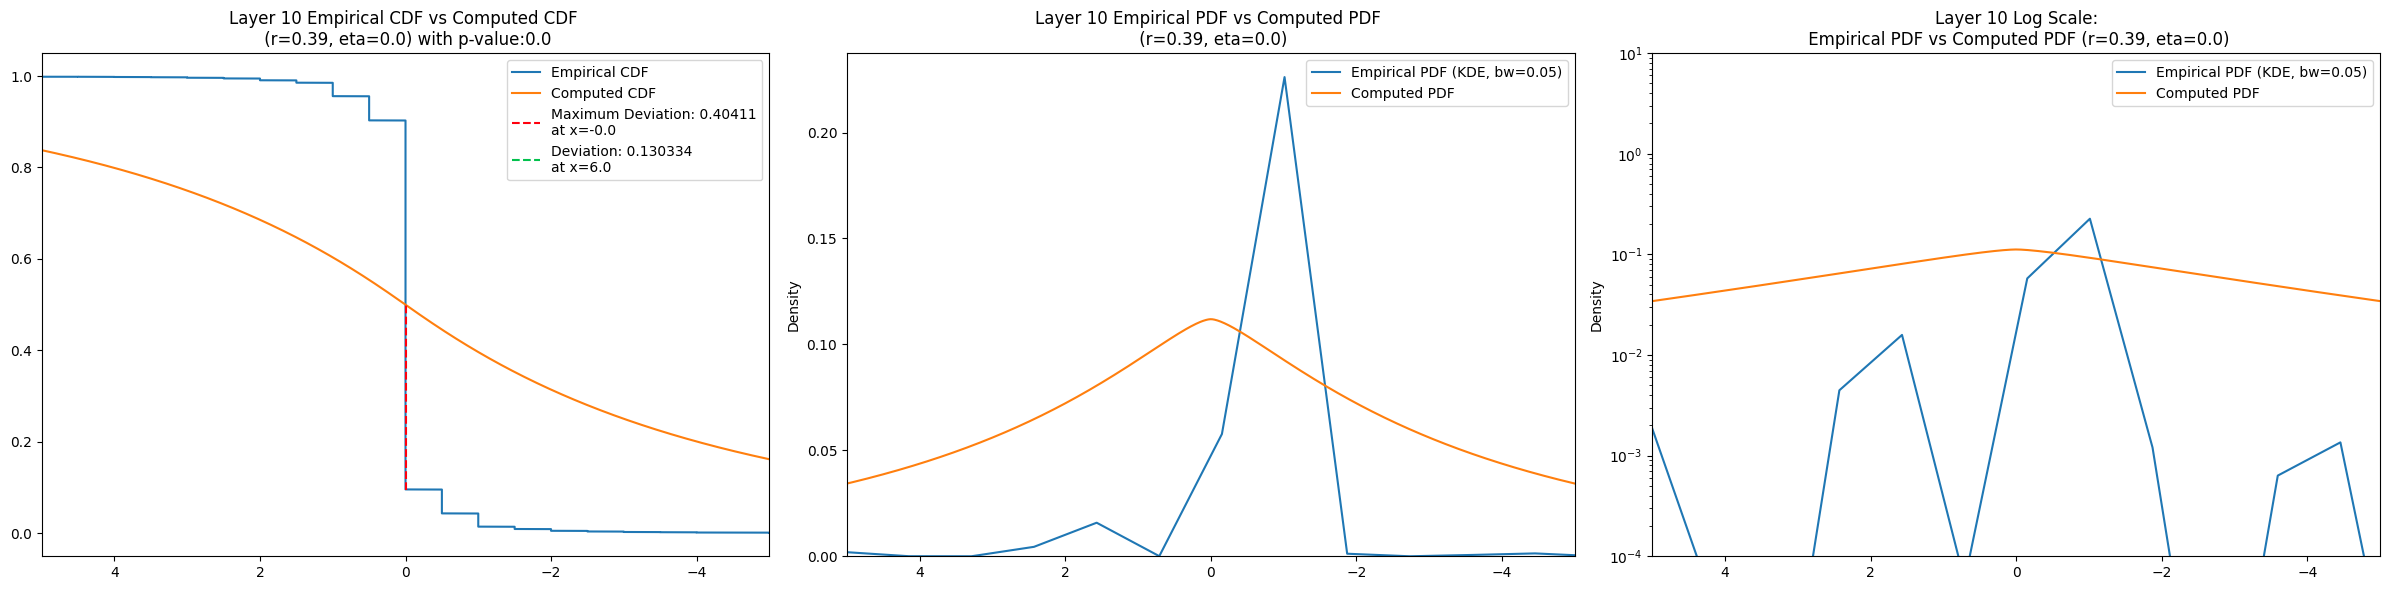

In [11]:
for group in np.arange(min_group, max_group+1):
    group_info = master_df.loc[group]
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (group_info[f'best_r_d{r_d}'], group_info[f'best_eta_d{eta_d}']), 
                    log_scale = True,
                    all_cdfs = all_cdfs,
                    group = group,
                    interval = (-(40 - group//3.1*15), (40 - group//3.1*15)),
                    provided_loc=(30 - group//3.1*8))
    fig.savefig(f'{DATA_NAME}/plots/compare_cdf_pdf_layer_{group}.png', bbox_inches = 'tight')

## Comparing with Gaussian and Laplace

In [12]:
SKIP_OPTIMIZE_STEP = True

def coord_descent_scipy(sample, initial_param):
    '''
    '''
    r_0, eta_0 = initial_param
    find_r_1 = scipy.optimize.minimize_scalar(generate_func(sample, 'gengamma_r', eta_0), method = 'bounded', bounds = (max(0.5, r_0-0.1), r_0+0.1))
    r_1 = find_r_1['x']
    find_eta_1 = scipy.optimize.minimize_scalar(generate_func(sample, 'gengamma_eta', r_1), method = 'bounded', bounds = (max(0, eta_0-0.1), eta_0+0.1))
    eta_1 = find_eta_1['x']
    find_r_2 = scipy.optimize.minimize_scalar(generate_func(sample, 'gengamma_r', eta_1), method = 'bounded', bounds = (max(0.5, r_1-0.1), r_1+0.1))

    r_2 = find_r_2['x']

    return r_2, eta_1, find_r_2['fun']

if SKIP_OPTIMIZE_STEP:
    master_df[f'best_r_scipy'], master_df[f'best_eta_scipy'], master_df[f'kstest_stat_cd_scipy'] =   master_df[f'best_r_d{r_d}'],  master_df[f'best_eta_d{eta_d}'], master_df['kstest_stat_initial']
else:
    for group in np.arange(min_group, max_group+1):
        master_df.loc[group, f'best_r_scipy'], master_df.loc[group, f'best_eta_scipy'], master_df.loc[group, f'kstest_stat_cd_scipy'] = coord_descent_scipy(group_data_map[group], master_df.loc[group, 'initial_param'])

master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_post_cd_scipy.csv')
master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_post_cd_scipy.csv', index_col = 'layer')
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df


,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0,total_samples,kstest_stat_cutoff_0.05,kstest_stat_cd,best_r_d2,best_eta_d1,n_pval_0.05,best_r_scipy,best_eta_scipy,kstest_stat_cd_scipy
layer,,,,,,,,,,,,,,
2,2016,"(0.23, 0.0)",0.054269,"(0.23, 0)",0.054269,2016,0.030163,0.054269,0.23,0.0,637,0.23,0.0,0.054269
3,8064,"(0.28, 0.1)",0.076343,"(0.27, 0)",0.076562,8064,0.015103,0.076343,0.28,0.1,318,0.28,0.1,0.076343
4,32256,"(0.34, 0.0)",0.084420,"(0.34, 0)",0.084420,32256,0.007557,0.084420,0.34,0.0,252,0.34,0.0,0.084420
5,100000,"(0.44, 0.0)",0.101250,"(0.44, 0)",0.101250,129024,0.003780,0.101250,0.44,0.0,175,0.44,0.0,0.101250
6,100000,"(0.56, 0.2)",0.130780,"(0.8, 0)",0.130780,516096,0.001890,0.130780,0.56,0.2,105,0.56,0.2,0.130780
7,100000,"(1.32, 0.1)",0.171150,"(1.25, 0)",0.171150,2064384,0.000945,0.171150,1.32,0.1,63,1.32,0.1,0.171150
8,100000,"(0.45, 0.3)",0.239720,"(1.25, 0)",0.239720,8257536,0.000473,0.239720,0.45,0.3,31,0.45,0.3,0.239720
9,100000,"(0.45, 0.0)",0.297740,"(0.45, 0)",0.297740,33030144,0.000236,0.297740,0.45,0.0,19,0.45,0.0,0.297740
10,100000,"(0.39, 0.0)",0.404110,"(0.39, 0)",0.404110,132120576,0.000118,0.404110,0.39,0.0,10,0.39,0.0,0.404110


In [13]:
for group in np.arange(min_group, max_group+1):
    norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, 50))
    laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, 50))
    t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, 50))
    
    master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
    master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

    master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

    master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

    master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
    master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

    master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(min(master_df.loc[group, 'kstest_stat_cd'], master_df.loc[group, 'kstest_stat_cd_scipy'])), 6)

master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_post_compare_priors.csv')
master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_post_compare_priors.csv', index_col = GROUP)
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0,total_samples,kstest_stat_cutoff_0.05,kstest_stat_cd,best_r_d2,best_eta_d1,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
2,2016,"(0.23, 0.0)",0.054269,"(0.23, 0)",0.054269,2016,0.030163,0.054269,0.23,0.0,...,50.000000,0.111215,3.568810e-22,50.000000,0.070632,3.434200e-09,42.926600,0.061996,3.529490e-07,1.334650e-05
3,8064,"(0.28, 0.1)",0.076343,"(0.27, 0)",0.076562,8064,0.015103,0.076343,0.28,0.1,...,24.258300,0.092842,6.103150e-61,19.071500,0.078423,1.387840e-43,15.797500,0.081369,6.839260e-47,2.536710e-41
4,32256,"(0.34, 0.0)",0.084420,"(0.34, 0)",0.084420,32256,0.007557,0.084420,0.34,0.0,...,9.645780,0.096301,8.139930e-261,7.205110,0.085338,8.061290e-205,5.800770,0.087117,1.915140e-213,1.944110e-200
5,100000,"(0.44, 0.0)",0.101250,"(0.44, 0)",0.101250,129024,0.003780,0.101250,0.44,0.0,...,3.881020,0.105603,0.000000e+00,2.778510,0.101250,0.000000e+00,2.224600,0.101250,0.000000e+00,0.000000e+00
6,100000,"(0.56, 0.2)",0.130780,"(0.8, 0)",0.130780,516096,0.001890,0.130780,0.56,0.2,...,1.603470,0.130780,0.000000e+00,1.089320,0.130780,0.000000e+00,1.792310,0.130780,0.000000e+00,0.000000e+00
7,100000,"(1.32, 0.1)",0.171150,"(1.25, 0)",0.171150,2064384,0.000945,0.171150,1.32,0.1,...,0.603822,0.171150,0.000000e+00,0.420538,0.171150,0.000000e+00,1.734210,0.171150,0.000000e+00,0.000000e+00
8,100000,"(0.45, 0.3)",0.239720,"(1.25, 0)",0.239720,8257536,0.000473,0.239720,0.45,0.3,...,0.107152,0.239720,0.000000e+00,2.786410,0.239720,0.000000e+00,0.035417,0.239720,0.000000e+00,0.000000e+00
9,100000,"(0.45, 0.0)",0.297740,"(0.45, 0)",0.297740,33030144,0.000236,0.297740,0.45,0.0,...,0.000006,0.297740,0.000000e+00,0.000006,0.297740,0.000000e+00,0.000005,0.297740,0.000000e+00,0.000000e+00
10,100000,"(0.39, 0.0)",0.404110,"(0.39, 0)",0.404110,132120576,0.000118,0.404110,0.39,0.0,...,0.000006,0.404110,0.000000e+00,0.000006,0.404110,0.000000e+00,0.000006,0.404110,0.000000e+00,0.000000e+00


# Examining Tail Behavior

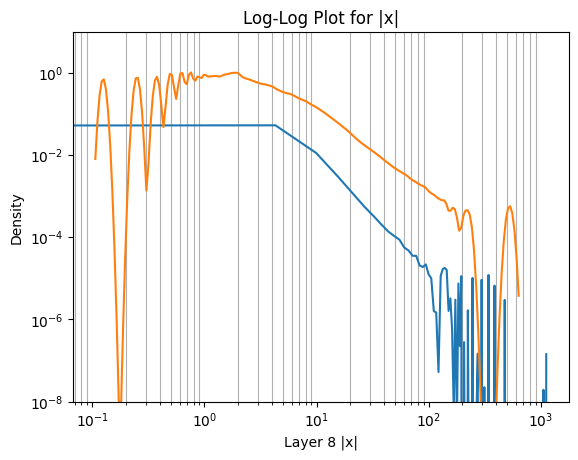

In [14]:
if GROUP == 'layer':
    bw = 0.05
    group = 7
    x = np.abs(group_data_map[group])
    fig = sns.kdeplot(x = x[x >= 0.1], bw_method = bw, label = f"Empirical PDF (KDE), bw={bw}")
    fig.set_xscale('log')
    fig.set_yscale('log')
    fig.set_ylim(bottom = 10**-8, top=10)
    plt.xlabel(f'Layer {group} |x|')
    plt.title(f'Log-Log Plot for |x|')
    plt.grid(True, 'minor')
    plt.savefig(f'{DATA_NAME}/plots/log-log_plot_layer_7.png', bbox_inches = 'tight')

    bw = 0.05
    group = 8
    x = np.abs(group_data_map[group])
    fig = sns.kdeplot(x = x[x >= 0.1], bw_method = bw, label = f"Empirical PDF (KDE), bw={bw}")
    fig.set_xscale('log')
    fig.set_yscale('log')
    fig.set_ylim(bottom = 10**-8, top=10)
    plt.xlabel(f'Layer {group} |x|')
    plt.title(f'Log-Log Plot for |x|')
    plt.grid(True, 'minor')
    plt.savefig(f'{DATA_NAME}/plots/log-log_plot_layer_8.png', bbox_inches = 'tight')


In [16]:
def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
    if metric_name == 'kstest_ratio':
        metric = compute_ksratio
    elif metric_name == 'kstest_stat':
        metric = compute_ksstat_tail

    for tail_cutoff in tail_cutoffs:
        metrics = []
        for layer in layers:
            if distro == 'gengamma':
                cdf = all_cdfs[master_df.loc[layer, 'initial_param']]
            elif distro == 'gaussian':
                cdf = stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
            elif distro == 'laplace':
                cdf = stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
            elif distro == 't':
                cdf = stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
            metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
        master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
for group in np.arange(min_group, max_group+1):
    add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(min_group, max_group+1))
    add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(min_group, max_group+1)) 
    add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(min_group, max_group+1))
    add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(min_group, max_group+1))
    add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(min_group, max_group+1))

master_df.to_csv(f'{DATA_NAME}/CSVs/master_df.csv')

master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df.csv', index_col = GROUP)
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:296: RuntimeWarning: divide by zero encountered in divide
  tail_ratios = np.nan_to_num(d[tail_idxs] / tail_vals)
c:\Users\yashd\.conda\envs\hbmv\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:296: RuntimeWarning: divide by zero encountered in divide
  tail_ratios = np.nan_to_num(d[tail_idxs] / tail_vals)
c:\Users\yashd\.conda\envs\hbmv\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:296: RuntimeWarning: divide by zero encountered in divide
  tail_ratios = np.nan_to_num(d[tail_idxs] / tail_vals)
c:\Users\yashd\.conda\envs\hbmv\Lib\site-packages\numpy\core\

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0,total_samples,kstest_stat_cutoff_0.05,kstest_stat_cd,best_r_d2,best_eta_d1,...,kstest_ratio_gengamma_tail0,kstest_ratio_gengamma_tail10,kstest_ratio_gaussian_tail0,kstest_ratio_gaussian_tail10,kstest_ratio_laplace_tail0,kstest_ratio_laplace_tail10,kstest_ratio_t_tail0,kstest_ratio_t_tail10,kstest_stat_gengamma_tail2,kstest_stat_gengamma_tail10
layer,,,,,,,,,,,,,,,,,,,,,
2,2016,"(0.23, 0.0)",0.054269,"(0.23, 0)",0.054269,2016,0.030163,0.054269,0.23,0.0,...,"(0.89328, 1712400000.0)","(0.92555, 1712400000.0)","(0.85777, inf)","(0.86028, inf)","(0.85777, inf)","(0.86028, inf)","(0.86103, 12.545)","(0.86446, 12.545)",0.054269,0.054269
3,8064,"(0.28, 0.1)",0.076343,"(0.27, 0)",0.076562,8064,0.015103,0.076343,0.28,0.1,...,"(0.842, 1710500000.0)","(0.91603, 1710500000.0)","(0.78837, inf)","(0.81681, inf)","(0.81834, inf)","(0.86962, inf)","(0.82475, 31.592)","(0.91024, 31.592)",0.075629,0.075629
4,32256,"(0.34, 0.0)",0.084420,"(0.34, 0)",0.084420,32256,0.007557,0.084420,0.34,0.0,...,"(0.82536, 361500000.0)","(0.9157, 361500000.0)","(0.78908, inf)","(0.90136, inf)","(0.81286, inf)","(0.86659, inf)","(0.81855, 30.721)","(0.90514, 30.721)",0.077830,0.077830
5,100000,"(0.44, 0.0)",0.101250,"(0.44, 0)",0.101250,129024,0.003780,0.101250,0.44,0.0,...,"(0.79303, 395240000.0)","(0.92388, 395240000.0)","(0.77557, inf)","(0.90401, inf)","(0.79179, inf)","(0.89964, inf)","(0.79413, 33.007)","(0.92072, 33.007)",0.080273,0.074124
6,100000,"(0.56, 0.2)",0.130780,"(0.8, 0)",0.130780,516096,0.001890,0.130780,0.56,0.2,...,"(0.74046, 2004800000.0)","(0.96045, 2004800000.0)","(0.74046, inf)","(0.9561, inf)","(0.74046, inf)","(0.9561, inf)","(0.74046, 33.874)","(0.97098, 33.874)",0.058720,0.039582
7,100000,"(1.32, 0.1)",0.171150,"(1.25, 0)",0.171150,2064384,0.000945,0.171150,1.32,0.1,...,"(0.66374, 15640000000.0)","(0.98189, 15640000000.0)","(0.66374, inf)","(0.98189, inf)","(0.66374, inf)","(0.98189, inf)","(0.65253, 7.3842)","(0.99623, 7.3842)",0.106643,0.018520
8,100000,"(0.45, 0.3)",0.239720,"(1.25, 0)",0.239720,8257536,0.000473,0.239720,0.45,0.3,...,"(0.20437, 648640.0)","(0.22468, 648640.0)","(0.52106, inf)","(0.99187, inf)","(0.35524, inf)","(0.99203, inf)","(0.52106, 4191.9)","(0.99188, 4191.9)",0.210737,0.027340
9,100000,"(0.45, 0.0)",0.297740,"(0.45, 0)",0.297740,33030144,0.000236,0.297740,0.45,0.0,...,"(0.077313, 251430.0)","(0.094372, 251430.0)","(0.40454, inf)","(0.99789, inf)","(0.40454, inf)","(0.99789, inf)","(0.40454, 35630000000.0)","(0.99789, 35630000000.0)",0.220752,0.020212
10,100000,"(0.39, 0.0)",0.404110,"(0.39, 0)",0.404110,132120576,0.000118,0.404110,0.39,0.0,...,"(0.0085123, 1051.6)","(0.010198, 1051.6)","(0.1918, inf)","(0.99937, inf)","(0.1918, inf)","(0.99937, inf)","(0.1918, 4484600000.0)","(0.99937, 4484600000.0)",0.308922,0.059216


# Results

In [ ]:
#master_df.filter(regex='num_samples|kstest_stat.*')
#master_df.filter(regex='num_samples|param.*')
# master_df.filter(regex='.*gaussian')
master_df.filter(regex='kstest_stat_.*')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


,kstest_stat_initial,kstest_stat_eta0,kstest_stat_cutoff_0.05,kstest_stat_cd,kstest_stat_cd_scipy,kstest_stat_gaussian,kstest_stat_laplace,kstest_stat_t,kstest_stat_gengamma_tail2,kstest_stat_gengamma_tail10
layer,,,,,,,,,,
2,0.021670,0.060374,0.024030,0.021670,0.021670,0.019503,0.036392,0.036305,0.021670,0.021670
3,0.008143,0.037031,0.012029,0.008143,0.008143,0.010128,0.022665,0.026410,0.008143,0.008143
4,0.006270,0.023245,0.006018,0.006270,0.006270,0.020474,0.014498,0.018489,0.005811,0.005487
5,0.005235,0.005645,0.003010,0.005235,0.005235,0.030178,0.002344,0.010570,0.003325,0.001370
6,0.020507,0.020507,0.001505,0.020507,0.020507,0.042375,0.014481,0.017941,0.019270,0.000847
7,0.082280,0.082280,0.000753,0.082280,0.082280,0.052929,0.025282,0.026440,0.016800,0.000030
8,0.227355,0.227355,0.000376,0.227355,0.227355,0.056358,0.029152,0.028140,0.006442,0.000010
